In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt
from sklearn.model_selection import train_test_split

In [2]:
#X = pd.read_excel("C:\Users\Niku\Documents\dataset\X_dataset.xlsx")
#y = pd.read_excel("C:\Users\Niku\Documents\dataset\y_category.xlsx")
#X = np.matrix(X)
#y = np.matrix(y)
#print X.shape 
#print y.shape
data = pd.read_excel("C:/Users/Niku/Documents/dataset/datatest.xlsx")
data.shape

(1992, 36)

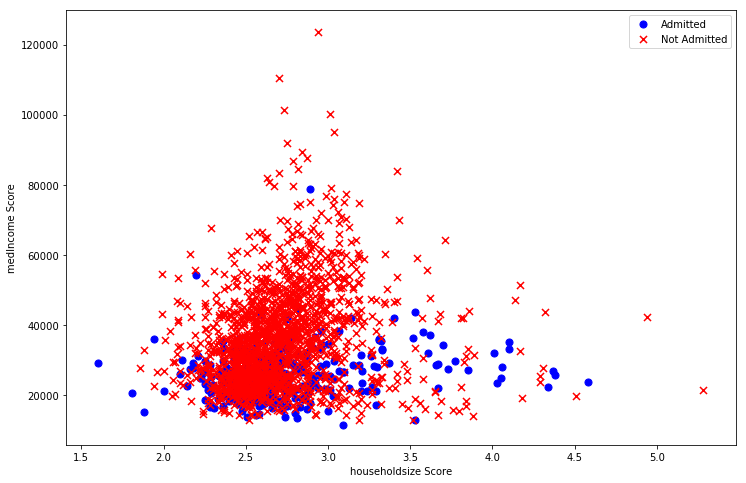

In [3]:
positive = data[data['Category'].isin([1])]
negative = data[data['Category'].isin([0])]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['householdsize'], positive['medIncome'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['householdsize'], negative['medIncome'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('householdsize Score')
ax.set_ylabel('medIncome Score')

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

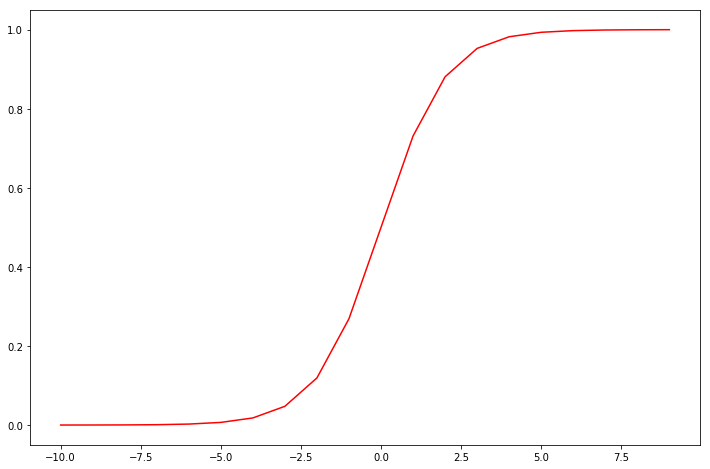

In [5]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')

In [6]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [7]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)


In [8]:
Normdata = data
Normdata = np.matrix(Normdata)

In [9]:
for i in range(1, Normdata.shape[1]):
    cur = Normdata[:, i]
    mx = max(cur)*1.0
    mn = min(cur)*1.0
    for j in range(0, len(cur)):
        cur[j] = (cur[j] - mn)/(mx - mn)
    Normdata[:, i] = cur

In [10]:
cols = Normdata.shape[1]
X = Normdata[:,0:cols-1]
y = Normdata[:,cols-1:cols]
# convert to numpy arrays and initalize the parameter array theta
#X = np.array(X.values)
#y = np.array(y.values)
theta = np.zeros(36)
X

matrix([[  1.00000000e+00,   4.07608696e-01,   1.41719251e-02, ...,
           0.00000000e+00,   4.15175068e-02,   1.77250138e-01],
        [  1.00000000e+00,   3.31521739e-01,   8.27557670e-03, ...,
           0.00000000e+00,   4.92244442e-02,   7.06791828e-02],
        [  1.00000000e+00,   2.25543478e-01,   7.65490845e-03, ...,
           0.00000000e+00,   6.26618332e-02,   8.04343825e-02],
        ..., 
        [  1.00000000e+00,   2.33695652e-01,   5.37912486e-03, ...,
           0.00000000e+00,   2.68024125e-02,   2.20872446e-03],
        [  1.00000000e+00,   3.50543478e-01,   3.48608669e-02, ...,
           0.00000000e+00,   4.82181099e-02,   0.00000000e+00],
        [  1.00000000e+00,   2.74456522e-01,   2.47232854e-02, ...,
           1.91442519e-04,   2.98734280e-02,   2.55843917e-02]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=1)
X_train.shape, theta.shape, y_train.shape

((996L, 36L), (36L,), (996L, 1L))

In [12]:
cost(theta, X_train, y_train)

0.6931471805599454

In [13]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [14]:
gradient(theta, X_train, y_train)

array([  2.94176707e-01,   8.79209774e-02,  -3.92072064e-04,
         2.80408327e-01,   1.32550925e-02,   1.51543444e-02,
         5.71240200e-02,   8.53974544e-02,   4.55247576e-02,
         5.73325389e-02,   1.92818574e-01,   7.23418175e-02,
         2.21556460e-01,   8.51557249e-02,   4.09687577e-02,
         8.98816431e-02,   6.24826526e-02,   4.13165739e-02,
         3.67806505e-02,   5.99192915e-02,   1.05557438e-01,
         4.48203297e-02,   1.94817532e-01,   1.15504401e-01,
         2.36380414e-01,   8.23716528e-03,   2.64388373e-01,
         1.00447446e-02,   9.29956367e-03,   1.92392968e-01,
         2.90393483e-02,   1.28265224e-01,  -5.16241934e-04,
        -2.44108433e-04,   1.39828932e-02,   1.31640126e-02])

In [15]:
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X_train, y_train))
result

(array([   5.86342803,    2.95854009,    5.29615079,    3.68941584,
           3.12455823,    2.39748865,    4.4571783 ,  -16.27698463,
           6.75623755,   -9.39910378,    0.62700927,  -14.1702787 ,
          -8.25495675,   -0.88920663,   -0.28105624,    0.17798947,
           7.28760449,   -3.03375825,   -6.35041312,    7.08290492,
           0.12326704,   -0.79527649,    3.82388644,   -0.17277882,
          -4.72770335,    3.80695082,   -1.84689312,   -6.5257385 ,
           7.81253634,   -1.6825234 ,    3.01473568,    3.31398121,
         103.90803374,   11.20904102,   -0.74317812,   -2.51523642]), 360, 3)

In [16]:
cost(result[0], X, y)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in multiply


nan

In [17]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.50 else 0 for x in probability]

In [18]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct))*100.0 / len(correct))
print 'accuracy = {0}%'.format(accuracy)

accuracy = 88.7550200803%
